# Optuna Optimization Example

This example demonstrates how to use the Optuna library for optimizing the Rosenbrock function, often used as a test problem for optimization algorithms. The Rosenbrock function is defined as:

\[
f(x, y) = (1 - x)^2 + 100 * (y - x^2)^2
\]

This function has a minimum at `(x, y) = (1, 1)`. 

First, let's visualize the function:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

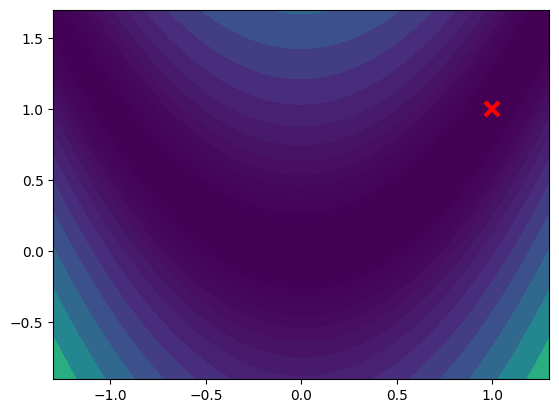

In [3]:
X, Y = np.meshgrid(np.linspace(-2, 2, 250), np.linspace(-1, 3, 250))
Z = f(X, Y)
_, ax = plt.subplots()
ax.plot([1], [1], 'x', mew=3, markersize=10, color="red")
ax.contourf(X, Y, Z, np.logspace(-1, 3, 30), cmap='viridis', extend="both")
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-0.9, 1.7)
plt.show()

The red cross indicates the minimum point of the function.

Next, we define the objective function for Optuna:

In [4]:
def objective(trial):
    x = trial.suggest_float("x", -2, 2)
    y = trial.suggest_float("y", -2, 2)
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

In this function, x and y are suggested in the range of [-2, 2]. Optuna will try to find the values of x and y that minimize this function.

We then create an Optuna study and perform optimization:

In [5]:
import optuna

# Set the verbosity level
optuna.logging.set_verbosity(optuna.logging.WARNING)

study = optuna.create_study()
study.optimize(objective, n_trials=1000)

Finally, we print out the best parameters found by Optuna:

In [6]:
study.best_params

{'x': 0.9454023366355007, 'y': 0.8968495106694057}